<a href="https://colab.research.google.com/github/comaserious/deep_learning_practice/blob/main/%EC%86%90%EA%B8%80%EC%94%A8_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
!pip install tensorflow.keras

ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
(train_images, train_labels), (test_images, test_labels) =tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8730 - loss: 0.4399
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1157
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0748
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9849 - loss: 0.0508
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0372


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
prediction = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0834
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
print(f"test losss : {test_loss}")
print(f"test_accuracy : {test_acc}")
print(f"predictions for the first test image : {prediction[0]}")

test losss : 0.06869253516197205
test_accuracy : 0.9800999760627747
predictions for the first test image : [4.8823289e-08 8.4123313e-09 5.0347080e-06 3.7297476e-05 1.6989559e-11
 4.1059391e-09 1.5926140e-13 9.9995589e-01 7.3194784e-08 1.5137724e-06]


In [17]:
import numpy as np

predicted_classes = np.argmax(prediction, axis=1)  # 각 이미지에 대해 가장 높은 확률을 가진 클래스

In [19]:
comparison = list(zip(test_labels, predicted_classes))  # 실제 클래스와 예측 클래스 쌍
print(f"Actual vs Predicted: {comparison[:10]}")  # 처음 10개의 결과 출력


Actual vs Predicted: [(7, 7), (2, 2), (1, 1), (0, 0), (4, 4), (1, 1), (4, 4), (9, 9), (5, 5), (9, 9)]


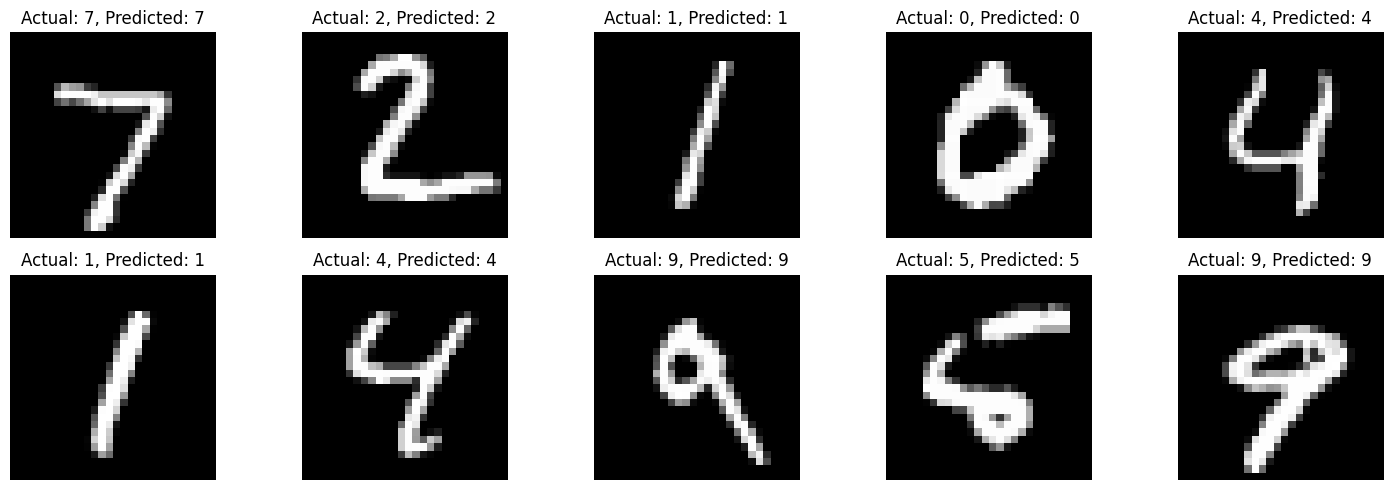

In [20]:
import matplotlib.pyplot as plt

# 첫 10개의 테스트 이미지 확인
num_images = 10
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # 이미지를 원래 모양으로 변환
    plt.title(f"Actual: {test_labels[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()